# Assessing orphaned wells in NY

**Data source:**
[Orphaned Wells](https://data.ny.gov/Energy-Environment/Orphaned-Wells/vgue-bamz): "List of wells that are regulated under the Oil, Gas and Solution Mining Law (ECL Article 23) in New York State that are orphaned and not plugged," Last Updated: 12/16/21 | Downloaded: 3/25/22

In this notebook, we are breaking down orphaned wells in New York by region, county and town. 

**Key terminology:**

'Orphaned wells' and 'abandoned wells' are **NOT** the same thing. It's also important to note that the definitions of these types of wells can vary state by state. Here's a brief explanation of how the NY DEC defines the two. For more info, [click here](https://www.dec.ny.gov/energy/111211.html#:~:text=Orphaned%20and%20Abandoned%20Wells&text=Orphaned%20wells%20are%20a%20subset,regulatory%20framework%20in%20New%20York)
* Abandoned wells: "Abandoned wells are unplugged wells (primarily oil or gas wells) that have not been operated and maintained in accordance with prevailing statute and regulation."
* Orphaned wells: "Orphaned wells are a subset of abandoned wells for which no owner can be determined."

In other words, all orphaned wells are abandoned wells, but not all abandoned wells are orphaned wells.


In [1]:
#Import pandas
from __future__ import print_function

import pandas as pd
pd.__version__

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


'1.3.4'

In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv("data_5_4_22/Oil__Gas____Other_Regulated_Wells__Beginning_1860.csv")
#Replace spaces in column names and change to lowercase
df_raw.columns = df_raw.columns.str.replace(' ', '_').str.lower()

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_raw.columns

Index(['api_well_number', 'county_code', 'api_hole_number', 'sidetrack',
       'completion', 'well_name', 'company_name', 'operator_number',
       'well_type', 'map_symbol', 'well_status_', 'status_date',
       'permit_application_date', 'permit_issued_date', 'date_spudded',
       'date_of_total_depth', 'date_well_completed', 'date_well_plugged',
       'date_well_confidentiality_ends', 'confidentiality_code', 'town',
       'quad', 'quad_section', 'producing_field', 'producing_formation',
       'financial_security', 'slant', 'county', 'region', 'state_lease',
       'proposed_depth,_ft', 'surface_longitude', 'surface_latitude',
       'bottom_hole_longitude', 'bottom_hole_latitude',
       'true_vertical_depth,_ft', 'measured_depth,_ft', 'kickoff,_ft',
       'drilled_depth,_ft', 'elevation,_ft', 'original_well_type',
       'permit_fee', 'objective_formation', 'depth_fee', 'spacing',
       'spacing_acres', 'integration', 'hearing_date', 'date_last_modified',
       'dec_databas

In [5]:
# rename well_status_ to well_status

df_raw = df_raw.rename(columns={'well_status_': 'well_status'})

In [6]:
df = df_raw[df_raw.well_status.isin(['UN', 'UL', 'UM'])]
df.well_status.unique()

array(['UN', 'UM', 'UL'], dtype=object)

**Reference note:** It seems the DEC has updated their dataset since we last downloaded in Oct. 2021. Previously, the below column called for 'WELLSTATUSCODE', but the values referenced in this column are now reflected in the 'well_status' column.

# 1. Looking at wells by status:

[Data dictionary here](https://data.ny.gov/Energy-Environment/Orphaned-Wells/vgue-bamz)

* UN: well status unknown, but detail on location, etc, provided to DEC through misc. means
* UL: well status unknown, but well located and inspection performed
* UM: well status unknown, DEC was unable to locate the well

For now, we want to filter out wells the DEC has NOT been able to locate. 

**Conclusions as of 3/25/22:**
* There are 6,808 known orphaned wells in New York state. 
* There are 4,649 wells that have been successfully located by the DEC, but have an unknown status. These wells remain unplugged. 
* There are 2,159 wells the DEC knows to exist, but has yet to locate. These wells are also unplugged. 

In [7]:
df.well_status.value_counts()
#UN: well status unknown, but detail on location, etc, provided to DEC through misc. means
#UL: well status unknown, but well located and inspection performed
#UM: well status unknown, DEC was unable to locate the well

UL    2588
UN    2487
UM    2216
Name: well_status, dtype: int64

In [8]:
# Filtering out wells the DEC was unable to locate
df_located = df[df['well_status']!='UM']

In [9]:
len(df_located)

5075

In [10]:
# Number of total orphaned wells in the state
len(df)

7291

In [22]:
df_located.to_csv('data_5_4_22/data_processed_5422/wells_orphaned_5422.csv', index=False)

**Reference note:** Since our last download in Oct. 2021, the DEC has located over 60 wells. 

# 2. Counting wells by NY DEC Region 

Here, we look at the distribution of orphaned wells by the regions in the state, determined by the DEC (more info [here](https://www.dec.ny.gov/about/558.html) and [here](https://www.dec.ny.gov/about/76070.html))

**Conclusions as of 3/25/22:**
* Region 9, or Western NY has the most orphaned wells at 3,815 **(82 percent of the orphaned wells in the state)**
* Region 8, or the Finger Lakes, is a distant second with 558 orphaned wells 

In [12]:
# Counting number of wells in each region
wells_region = df_located.region.value_counts().rename_axis('region').reset_index(name='count')
wells_region

,region,count
0,9.0,4220
1,8.0,571
2,7.0,225
3,6.0,48
4,4.0,7
5,5.0,3
6,3.0,1


<AxesSubplot:title={'center':'Count of orphaned wells by NYDEC Region'}, xlabel='region'>

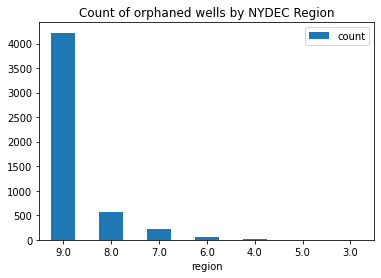

In [13]:
# Visualization of well count by region in New York
wells_region.plot.bar(x='region', y='count', rot=0, title='Count of orphaned wells by NYDEC Region')

In [14]:
# Calculating percentage of wells in each NYSDEC region
df_located.region.value_counts(normalize=True)

9.0    0.831527
8.0    0.112512
7.0    0.044335
6.0    0.009458
4.0    0.001379
5.0    0.000591
3.0    0.000197
Name: region, dtype: float64

# 3. Counting wells by county

Now, we're taking a look at the distribution of orphaned wells by county. 

**Conclusions as of 3/25/22:**
* Allegany County has the majority of orphaned wells in the state at 2,324 **(49.9 percent of the orphaned wells in the state)**
* Cattaraugus County is in second at 1,083 orphaned wells (23.23 percent of the orphaned wells in the state) 
* Steuben County is in third at 421 orphaned wells (9 percent of the orphaned wells in the state)
* These three counties account for over 80 percent (82.3 percent) of the orphaned wells in the state

In [15]:
# Count number of wells in each county
wells_county = df_located.county.value_counts().rename_axis('county').reset_index(name='count')
wells_county.head(10)

,county,count
0,Allegany,2267
1,Cattaraugus,1316
2,Steuben,427
3,Erie,240
4,Chautauqua,134
5,Oswego,115
6,Ontario,44
7,Tompkins,37
8,Oneida,33
9,Wyoming,28


In [16]:
# Percentage split of orphaned wells by county 
df_located.county.value_counts(normalize=True).head(10)

Allegany       0.466653
Cattaraugus    0.270893
Steuben        0.087896
Erie           0.049403
Chautauqua     0.027583
Oswego         0.023672
Ontario        0.009057
Tompkins       0.007616
Oneida         0.006793
Wyoming        0.005764
Name: county, dtype: float64

In [17]:
# The top 2 counties with orphaned wells account for 74% of the orphaned wells in the state
df_located.county.value_counts(normalize=True).head(2).sum()

0.7375463153561136

In [18]:
#Download CSV of number of unplugged and abandoned wells in each county
wells_county.to_csv('data_5_4_22/data_processed_5422/unplug_orphaned_5422.csv', index=False) 

In [19]:
# Calculating percent of wells in each county
# df_located.county.value_counts(normalize=True)

# 3. Counting wells by town

And finally, we're looking at the distribution of orphaned wells by town. 

**Conclusions as of 3/25/22:**
* Bolivar has the most orphaned wells at 1,079 (24.3 percent of orphaned wells in the state)
* Allegany is second with 886 orphaned wells (19.9 percent of orphaned wells in the state)

In [20]:
# Calculating number of wells in each town
wells_city = df_located.town.value_counts().rename_axis('city').reset_index(name='count')
wells_city.head(25)

,city,count
0,Bolivar,1084
1,Allegany,1082
2,Wirt,396
3,West Union,342
4,Alma,339
5,Genesee,179
6,Scio,88
7,Carrollton,85
8,Collins,60
9,Wellsville,54


In [21]:
# Calculating percent of wells in each town

df_located.town.value_counts(normalize=True).head(25)

Bolivar        0.223921
Allegany       0.223508
Wirt           0.081801
West Union     0.070647
Alma           0.070027
Genesee        0.036976
Scio           0.018178
Carrollton     0.017558
Collins        0.012394
Wellsville     0.011155
Sandy Creek    0.010948
Olean          0.010328
Brant          0.009915
Willing        0.009089
Richland       0.008263
Busti          0.007436
Perrysburg     0.006610
Clarksville    0.006197
Red House      0.005784
Sheridan       0.005371
Alden          0.005371
Andover        0.004545
Hanover        0.003925
Greenwood      0.003512
Camden         0.003512
Name: town, dtype: float64